## Pytorch Implementation of Attention

After understanding the basics, we can just use the pytorch implementation of attention.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import torch 
from torch import optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F
import torch.nn as nn

from tqdm.notebook import trange, tqdm

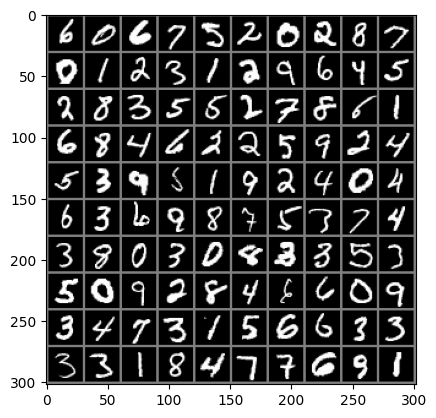

In [2]:
# Folder where the dataset is used
data_set_root = "../data"

# Downloading the mnist (training set)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5],[0.5])])
dataset = datasets.MNIST(data_set_root, train=True, download=True, transform=transform)

# Selecting randomly 100 examples
number_of_examples = 100
rand_perm = torch.randperm(dataset.data.shape[0])[:number_of_examples]
dataset_tensor = torch.cat([dataset.__getitem__(i)[0].reshape(1,-1) for i in rand_perm])

out = torchvision.utils.make_grid(dataset_tensor.reshape(-1, 1, 28, 28), 10, normalize=True, pad_value=0.5)
plt.imshow(out.numpy().transpose(1,2,0))

# Pytorch Multi-Head Attention 

The pytorch library has multi-head attention implemented. 
The docs can be found here: https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html

We can create a multi-head attention like this: 

In [4]:
# Define vector size
vec_size = 32

# Number of heads
number_of_heads = 8

# Batch size 
batch_size = 32 

# Create a batch of a single random query vector
query = torch.randn(batch_size, 1, number_of_heads*vec_size)

# Create random key vector for each unique image in the dataset
key = torch.randn(batch_size, number_of_examples, number_of_heads*vec_size)

# Create value vector from the images 
value = torch.randn(batch_size, number_of_examples, number_of_heads*vec_size)

# Creating the attention 
multi_attn = nn.MultiheadAttention(number_of_heads*vec_size, number_of_heads, batch_first=True)

In [6]:
# Forward pass
output, output_weights = multi_attn(query, key, value, average_attn_weights=False)

It is defined as: 

$$
\begin{aligned}
& \qquad \operatorname{MultiHead}(Q, K, V)=\operatorname{Concat}\left(\text { head }_1, \ldots, \text { head }_h\right) W^O \\
& {\text { where } \text { head }_i=\operatorname{Attention}\left(Q W_i^Q, K W_i^K, V W_i^V\right) .}^{\text {Q }}
\end{aligned}
$$

It contains the attention from multiple heads and then multiply it by some learnable weight parameters.  

In [7]:
# Forward pass results
print("Softmax Attention Mask ", output_weights.shape)
print("Attention output ", output.shape)

Softmax Attention Mask  torch.Size([32, 8, 1, 100])
Attention output  torch.Size([32, 1, 256])
